In [43]:
#Load the librarys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/Lenovo/Downloads/german_credit_data.csv")

In [44]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [45]:
df['Risk'] = df['Risk'].map({'good' : 1, 'bad': 0})
df['Sex'] = df['Sex'].map({'male' : 1, 'female': 0})

df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,1,2,own,NaN,little,1169,6,radio/TV,1
1,1,22,0,2,own,little,moderate,5951,48,radio/TV,0
2,2,49,1,1,own,little,NaN,2096,12,education,1
3,3,45,1,2,free,little,little,7882,42,furniture/equipment,1
4,4,53,1,2,free,little,little,4870,24,car,0


In [47]:
df1 = df.groupby('Purpose')
dfP = df1['Risk'].count() * df1['Risk'].mean()
df['Purpose'] = df['Purpose'].map(dfP)


df1 = df.groupby('Saving accounts')
dfP = df1['Risk'].count() * df1['Risk'].mean()
df['Saving accounts'] = df['Saving accounts'].map(dfP)

df1 = df.groupby('Housing')
dfP = df1['Risk'].count() * df1['Risk'].mean()
df['Housing'] = df['Housing'].map(dfP)


df1 = df.groupby('Checking account')
dfP = df1['Risk'].count() * df1['Risk'].mean()
df['Checking account'] = df['Checking account'].map(dfP)


df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,1,2,527.0,NaN,139.0,1169,6,218.0,1
1,1,22,0,2,527.0,386.0,164.0,5951,48,218.0,0
2,2,49,1,1,527.0,386.0,NaN,2096,12,36.0,1
3,3,45,1,2,64.0,386.0,139.0,7882,42,123.0,1
4,4,53,1,2,64.0,386.0,139.0,4870,24,231.0,0


In [51]:
df['Saving accounts'].dtype

dtype('float64')

In [40]:
from sklearn.impute import KNNImputer
df_knn_imputer = df.copy()

In [52]:
feature_cols = [col for col in df.columns if col in ['Saving accounts', 'Checking account']]

In [54]:
knn_imputer = KNNImputer(n_neighbors=5)

df_knn_imputer[feature_cols] = knn_imputer.fit_transform(df_knn_imputer[feature_cols])

df_knn_imputer.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,1,2,527.0,386.0,139.0,1169,6,218.0,1
1,1,22,0,2,527.0,386.0,164.0,5951,48,218.0,0
2,2,49,1,1,527.0,386.0,144.0,2096,12,36.0,1
3,3,45,1,2,64.0,386.0,139.0,7882,42,123.0,1
4,4,53,1,2,64.0,386.0,139.0,4870,24,231.0,0


In [67]:
df2 = df_knn_imputer
del df2["Unnamed: 0"]

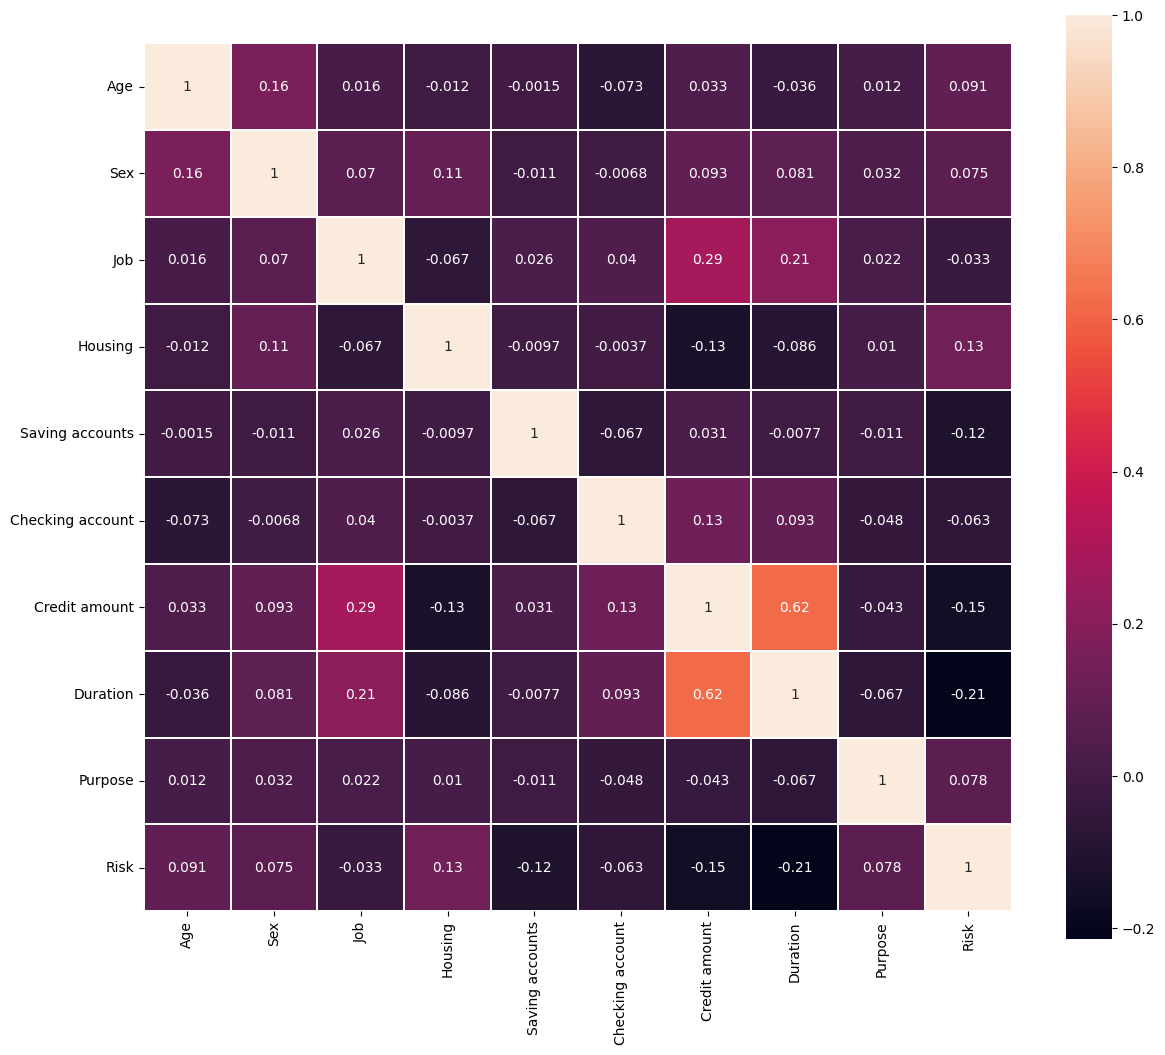

In [68]:
import seaborn as sns
plt.figure(figsize=(14,12))
sns.heatmap(df2.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

In [69]:
import xgboost

In [70]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

from sklearn.model_selection import GridSearchCV

# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [76]:
X = df2.drop(columns=['Risk']).values
y = df2["Risk"].values

In [78]:
# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/st

LR: 0.923449 (0.054964)
LDA: 0.918097 (0.065002)
KNN: 0.836190 (0.047986)
CART: 0.727821 (0.053543)
NB: 0.865276 (0.067003)
RF: 0.883956 (0.050784)
SVM: 1.000000 (0.000000)
XGB: 0.867866 (0.043107)


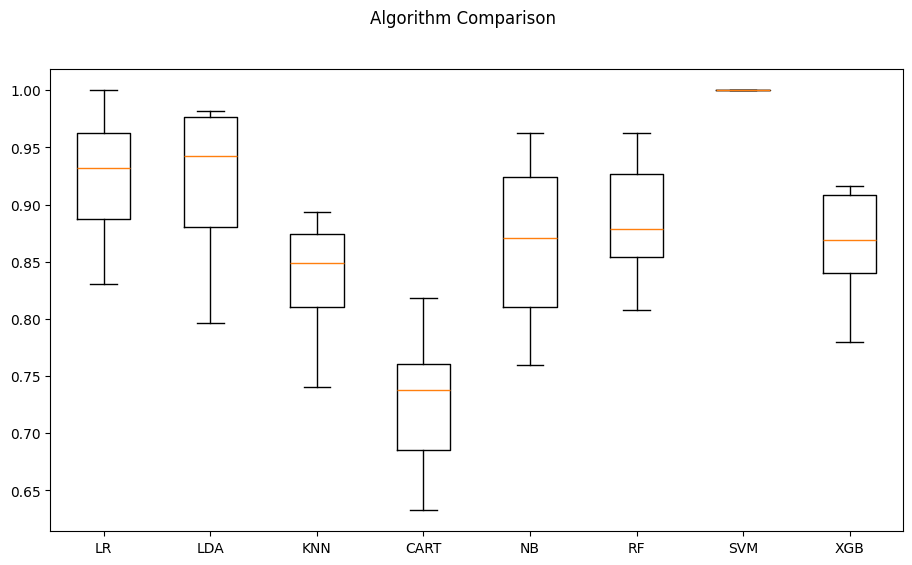

In [81]:
# to feed the random state
seed = 7

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'recall'

for name, model in models:
        kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [82]:
#Seting the Hyper Parameters
param_grid = {"max_depth": [3,5, 7, 10,None],
              "n_estimators":[3,5,10,25,50,150],
              "max_features": [4,7,15,20]}

#Creating the classifier
model = RandomForestClassifier(random_state=2)

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='recall', verbose=4)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.962 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.924 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.885 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.923 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=4, n_estimators=3;, score=0.971 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.962 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.924 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.933 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.962 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=4, n_estimators=5;, score=0.971 total time=   0.0s
[CV 1/5] END max_depth=3, max_feature

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2),
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'max_features': [4, 7, 15, 20],
                         'n_estimators': [3, 5, 10, 25, 50, 150]},
             scoring='recall', verbose=4)

In [83]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.9712637362637363
{'max_depth': 3, 'max_features': 4, 'n_estimators': 150}


In [84]:
rf = RandomForestClassifier(max_depth=None, max_features=10, n_estimators=15, random_state=2)

#trainning with the best params
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=10, n_estimators=15, random_state=2)

In [85]:
#Testing the model 
#Predicting using our  model
y_pred = rf.predict(X_test)

print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(fbeta_score(y_test, y_pred, beta=2))

0.7


[[ 25  47]
 [ 28 150]]


0.8250825082508251


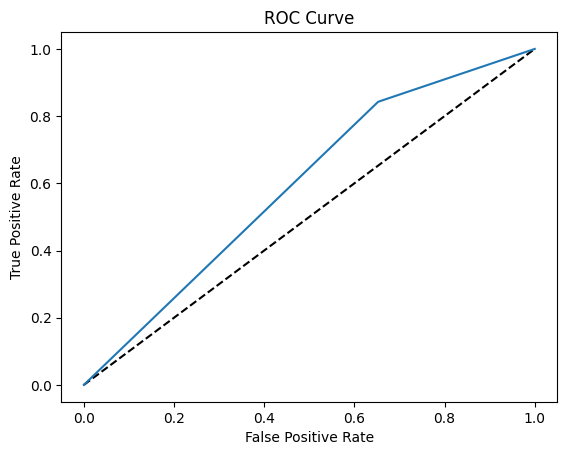

In [88]:
# Generate ROC curve values: fpr, tpr, thresholds
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Training score data: 
0.7093333333333334


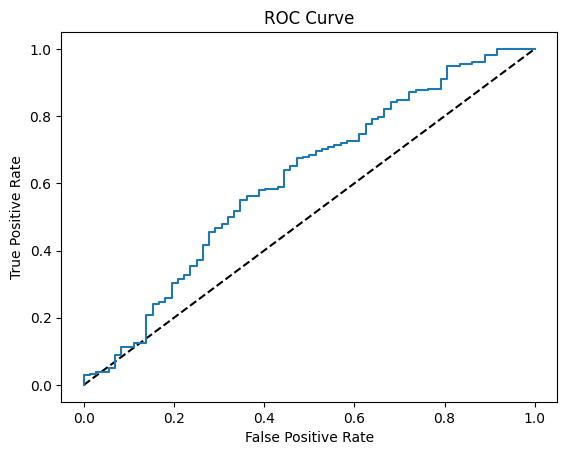

In [89]:
#Using Gaussian model
GNB = GaussianNB()

# Fitting with train data
model = GNB.fit(X_train, y_train)
# Printing the Training Score
print("Training score data: ")
print(model.score(X_train, y_train))
#Predicting proba
y_pred_prob = model.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4518 - loss: 128.5563 - val_accuracy: 0.6643 - val_loss: 16.9494
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6450 - loss: 12.1038 - val_accuracy: 0.5214 - val_loss: 4.7948
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5763 - loss: 6.8869 - val_accuracy: 0.6071 - val_loss: 6.9971
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6741 - loss: 4.4346 - val_accuracy: 0.5071 - val_loss: 4.4083
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6962 - loss: 3.7073 - val_accuracy: 0.5286 - val_loss: 3.6344
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5882 - loss: 3.2906 - val_accuracy: 0.6643 - val_loss: 2.1615
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6296 - loss: 3.1185 - val_accuracy: 0.5214 - val_loss: 2.1662
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6348 - loss: 2.8390 - val_accuracy: 0.6429 - val_l

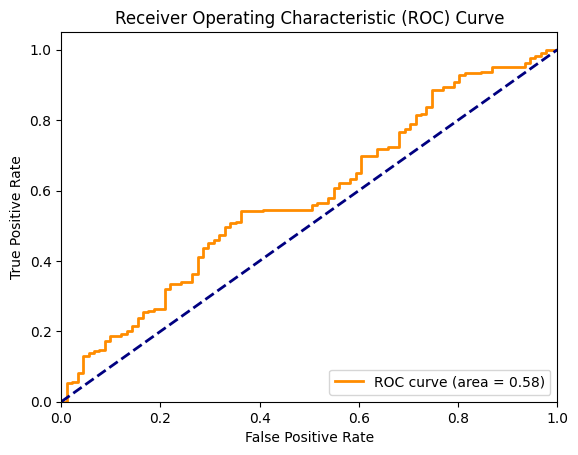

In [92]:
import numpy as np
import pandas as pd
import tensorflow
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Build the neural network
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Step 3: Train the model
model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2, verbose=1)

# Step 4: Evaluate the model and plot the ROC curve
y_pred_prob = model.predict(X_test).ravel()  # Get predicted probabilities

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
